In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

#### If you want to plot grayscale images, use the parameter cmap='gray' when plt.imshow

#### If you want the figures to be bigger, you can call plt.figure(figsize=(12, 8)) before calling plt.imshow (feel free to modify the values in figsize)

###**Edge Detection 1D**

**In class we learned a lot about edge detection and the various techniques that enable us to perform edge detection. In this notebook we'll run through a few examples to get you more familiarized with edge detection.**

**Edges are simply rapid changes in image intensity within a smalll region, and despite the seemingly obvious description, there are a variety of types of edges. Below are some of these edges in 1D.**

In [2]:
edge_step_1 = np.array([0, 0, 0, 0, 0, 5, 5, 5, 5, 5])
edge_step_2 = np.array([0, 0.5, 1, 1.5, 2, 9, 8.5, 8.0, 7.5, 7.0])
edge_step_3 = np.array([0, 0.5, 1, 1.5, 2, 7.8, 8.4, 8.8, 9.0, 9.0])
edge_line_1 = np.array([0, 0, 0, 0, 7, 7, 0, 0, 0, 0])
edge_line_2 = np.array([6, 5, 4, 3, 8, 8, 3, 2, 1, 0])
edge_roof_1 = np.array([3, 4, 5, 6, 7, 8, 6.5, 5, 3.5, 2])
edge_real_1 = np.array([0, 1, 1, 0, 1, 8, 7, 9, 7, 8])

**Seems pretty hard to visualize with just numbers (at least for me). Plot the edge_step edges in one graph, the edge_line edges in one graph, and the edge_roof and edge_real edges in one graph.**

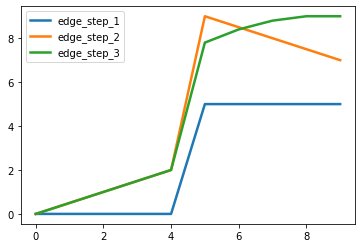

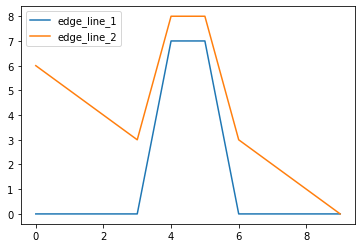

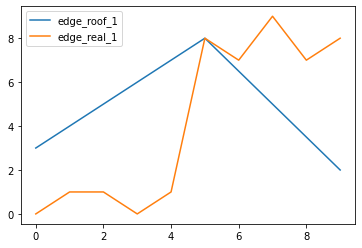

In [3]:

plt.plot(edge_step_1 , linewidth=2.5, linestyle="-", label="edge_step_1")
plt.plot(edge_step_2 , linewidth=2.5, linestyle="-", label="edge_step_2")
plt.plot(edge_step_3 , linewidth=2.5, linestyle="-", label="edge_step_3")
plt.legend(loc='upper left')
plt.show()
# plt.savefig('D:\\python_practice\\导出的图片.png')

plt.plot(edge_line_1 , label="edge_line_1")
plt.plot(edge_line_2 , label="edge_line_2")
plt.legend(loc='upper left')
plt.show()

plt.plot(edge_roof_1, label="edge_roof_1")
plt.plot(edge_real_1, label="edge_real_1")
plt.legend(loc='upper left')
plt.show()


**We see that there are many different types of edges, and that real edges are often noisy, as seen in edge_real_1.**

**So let's begin to explore how we are able to find the exact location of the edge within these 1D arrays.**

**Write a function below that computes the derivative of the 1D array. That is, it computes the difference between the current value and the next value for each value in the array. We won't worry too much about boundary conditions right now, so we'll just have the derivative array be one shorter than the input edge array.**

In [4]:
def derivative_1d(edge):
    """ Finds the derivative of the 1D array.
      The derivative at position i is simply (edge[i + 1] - edge[i])
      Args: 
          edge: A 1D numpy array with length [n]
      Returns:
              derivative: A 1D numpy array with length [n - 1]
    """
# Finish the function
    derivative = np.diff(edge)

    return derivative

**Test your function out by running it with the edge_real_1 above and another edge array of your choice. For each edge, plot both the edge and its derivative on the same graph (which means you should be plotting two graphs here). When plotting, shift your derivative plot by 0.5 units so that each plotted value appears between the two elements that was used to compute it.**

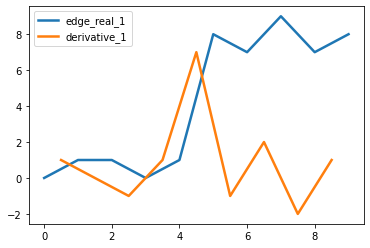

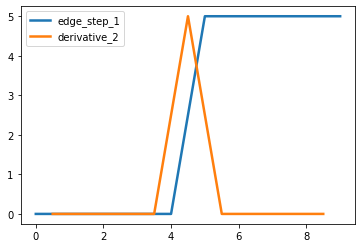

In [5]:
derivative_1 = derivative_1d(edge_real_1)
plt.plot(edge_real_1 , linewidth=2.5, linestyle="-", label="edge_real_1")
x = np.arange(len(derivative_1))
x = x + 0.5
#print(edge_real_1)
#print(derivative_1)
plt.plot( x , derivative_1 , linewidth=2.5, linestyle="-", label="derivative_1")
plt.legend(loc='upper left')
plt.show()


derivative_2 = derivative_1d(edge_step_1)
plt.plot(edge_step_1 , linewidth=2.5, linestyle="-", label="edge_step_1")
x = np.arange(len(derivative_2))
x = x + 0.5
#print(x)
plt.plot( x , derivative_2 , linewidth=2.5, linestyle="-", label="derivative_2")
plt.legend(loc='upper left')
plt.show()

**From the plot of the edge_real, we see that there are multiple peaks, but the largest peak there corresponds to what we consider as the edge.**

**Within the function you wrote above, you probably (hopefully you did?) either looped through each element to take the difference with the next value, or did some list subtraction. Either way, we can actually do this via convolutions! Convolutions are useful when we want to apply the same operation to each element by applying some relationship with neighbouring cells, which is exactly what the derivative is doing!**

**Create a 2 element 1D kernel [1, -1]. Convolve this with the same two edges that you plotted just now (use mode='valid' to get the same output dimensions are your function). This time plot the convolution result you got here with the derivative you found using your function (again, have a different plot for each of the edges)**

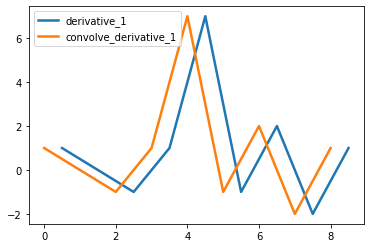

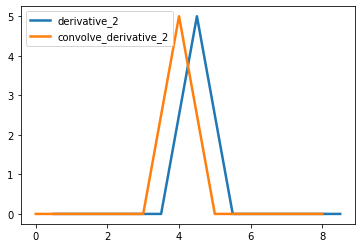

In [6]:
kernel = np.array([1,-1],dtype = np.float32)
result = np.convolve( edge_real_1 , kernel, mode = 'valid')
x = np.arange(len(derivative_1))
x = x + 0.5
plt.plot( x , derivative_1 , linewidth=2.5, linestyle="-", label="derivative_1")
plt.plot(result , linewidth=2.5, linestyle="-",label="convolve_derivative_1")
plt.legend(loc='upper left')
plt.show()

result = np.convolve( edge_step_1 , kernel, mode = 'valid')
x = np.arange(len(derivative_2))
x = x + 0.5
plt.plot( x , derivative_2 , linewidth=2.5, linestyle="-", label="derivative_2")
plt.plot(result , linewidth=2.5, linestyle="-",label="convolve_derivative_2")
plt.legend(loc='upper left')
plt.show()

I shifted the result made by function to have a better comparison

**They should be exactly the same! Recall that for convolutions, there's first a flip and then a shift. The flip means the kernel becomes [-1, 1]. Shifting over each value then results in edge[i + 1] - edge[i]. Now you've seen convolutions being used for edge detection in 1D, we can now move to 2D images!**

###**Edge Detection 2D**

**Now let's see what we can do with images. First, load 'cv_edge_detect.jpg'.**

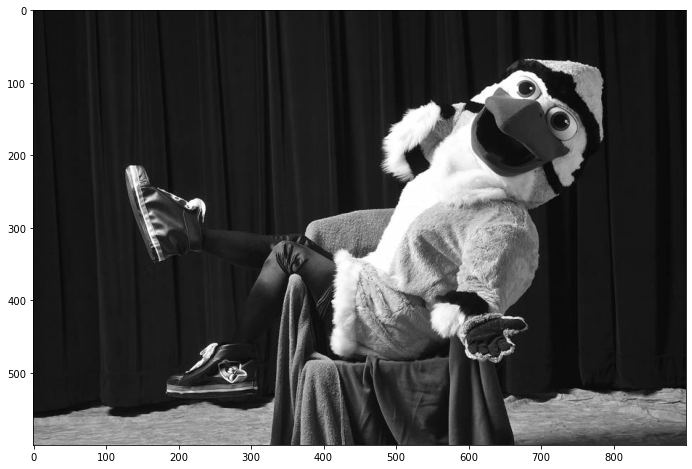

In [7]:
import cv2
original_image = cv2.imread('cv_edge_detect.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12,8))
plt.imshow(original_image, cmap='gray')

**We saw just now how we could use a kernel and convolution to find the edges in 1D arrays. Let's do the same thing with images! This time, create a 2D kernel of size (1, 3) that is [-1, 0, 1] and convolve that with the image loaded above. Display the results.**

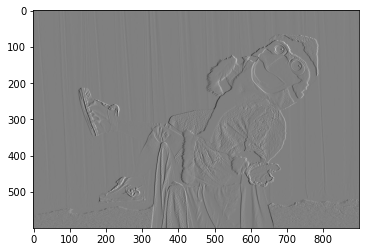

In [8]:
from scipy import signal
kernel = np.array([-1 ,0 ,1] , ndmin=2)
result = signal.convolve2d( original_image , kernel ,mode = 'valid' )
plt.imshow(result , cmap = "gray")

**What does this seem to be doing? Why can't you see the bottom edge of the mascot's left shoe?**

It seems to be counting the gradient in horizontal direction.
In horizontal direction, the gradient of mascot's left shoe is not very great, so it is not very clear.

**Now, create a 2D kernel of size (3, 1) that is [-1, 0, 1] and convolve that with the original image. Display the results.**

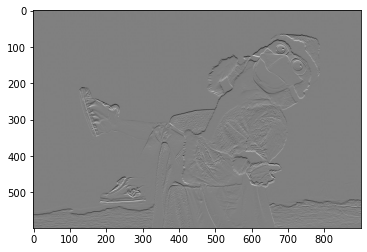

In [9]:
kernel2 = kernel.transpose()
result2 = signal.convolve2d( original_image , kernel2 ,mode = 'valid' )
plt.imshow(result2 , cmap = "gray")

**What does this do that's different? What about the convolution kernels make the images look different?**

It seems to be counting the gradient in vertical direction. The kernel is the transpose of the last one, so it changes the direction of derevative.

**Using these kernels, what we're doing is essentially taking the gradient between pixels in the x, and in the y direction respectively. Hence in each of the images after convolution, each pixel value is the gradient in either the x direction or the y direction.**

**Besides taking the simple derivative between the two neighbouring pixels, we can also try and compute the derivative by taking into account the pixel values of more surrounding pixels, and taking the derivative across those pixels. We can do this using the sobel filters, as you've probably seen in class. Use cv2 to apply the sobel filter of size 7 in the x, and also in the y direction separately, and display both images.**



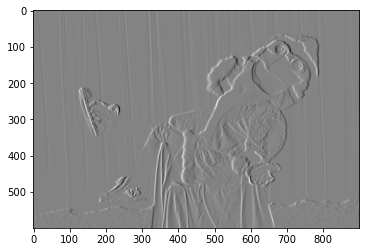

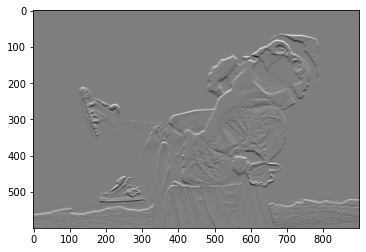

In [10]:
#.cv2.Sobel(src, ddepth, dx, dy, ksize)
sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0,ksize=7)
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1,ksize=7)
plt.imshow(sobel_x, cmap = "gray")
plt.show()
plt.imshow(sobel_y, cmap = "gray")

**You'll notice that the sobel operator makes the resulting gradient image slightly blurry, since it incorporates a bit of gaussian smoothening with it. Why do we want to consider a larger area when computing the gradient?**

**It's nice being able to find the gradient in the x and in the y directions separately, but it's not nice always having to look through both images in order to find all of the edges. Also, some of the diagonal edges show up faintly in both the horizonal and vertical gradient images, as its gradient contribution is split across the two images.**

**Hence we need some way of combining these gradients in different directions, such that identical edges oriented differently will have the same representation in one single image.**



**This brings us to the concept of gradient magnitude, which in essence, is the strength of the edge at that particular pixel. When computing this, we don't care about the orientation of the edge - a strong edge in the x direction should have the same magnitude if that edge is oriented in any other direction.**

**Write a function below that does exactly this. Given an image and a filter size, it uses the sobel operator (sigma = filter size) to find the gradients in the x, and in the y directions, and then computes the gradient magnitude at each pixel and returns the resulting gradient magnitude map.**

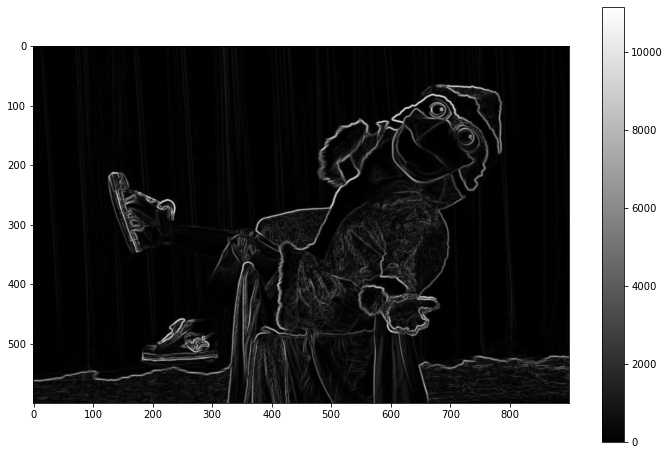

In [11]:
def gradient_magnitude(image, filter_size):
    """ Finds the gradient magnitude map of the image.
          The equation for gradient magnitude should be in slide 12 of lecture 5 (assuming that I have the same slides as you)
          Args: 
              image: A 2D grayscaled image
              filter_size: An int representing the size of the sobel filters
          Returns:
              grad_mag: A 2D gradient magnitude map
    """

  # Finish the function
    sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize = filter_size)
    sobel_x = sobel_x * sobel_x
    
    sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize = filter_size)
    sobel_y = sobel_y * sobel_y
    
    grad_mag = np.sqrt(sobel_x + sobel_y)
    return grad_mag

gradient_image = gradient_magnitude(original_image, 5)
plt.figure(figsize=(12,8))
plt.imshow(gradient_image, cmap='gray')
plt.colorbar()

**That's great! Jay's edges and curves should now be very clear in this image. But notice a problem - there's a lot of textures on Jay, which show up as fainter edges in our gradient magnitude map. We don't really count these textures as an edge, so we want to remove them. Since they appear weaker in magnitude than true edges, we can remove them via thresholding!**

**To start, let's use a simple threshold - set all pixels of gradient_image with a gradient magnitude greater than 3000 to 255, and everything else to 0**

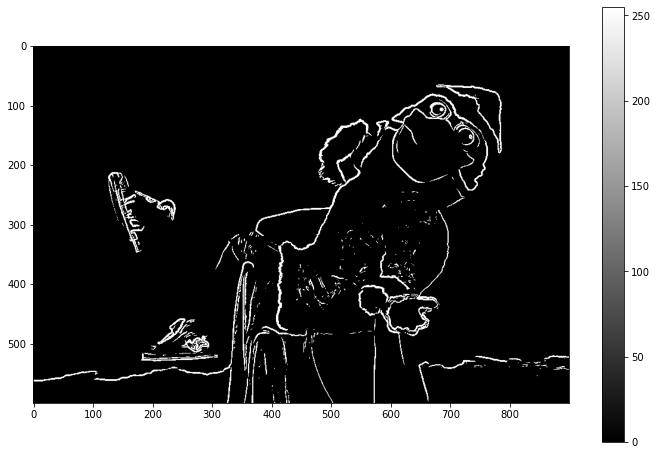

In [12]:
new_image = gradient_image.copy()
new_image [new_image <= 3000] = 0
new_image [new_image > 3000] = 255

plt.figure(figsize=(12,8))
plt.imshow(new_image, cmap='gray')
plt.colorbar()

**It looks a lot better now, with the majority of the fine details removed. However, there's still quite a lot of noise in the image from the texture. There's a method that we can use to remove some of this noise on Jay, and we've already applied it to "j" previously... Once you figure it out, use a 2x2 kernel of ones. Display the result.**

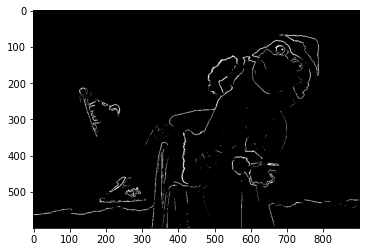

In [13]:
kernel = np.ones((2,2))
erosion = cv2.erode(new_image , kernel)
plt.imshow(erosion , cmap='gray')

**We see that a lot of the noise has been removed! But Jay has lost some of his edges along the way, hence this isn't the best way to do it.**

**Another thresholding method that works better is hysteresis based. This method has two thresholds. Anything below the lower threshold is not an edge, and everything above the upper threshold is an edge. Anything in between the two thresholds is only an edge if a neighbouring cell is an edge.**

**I was going to run you through an implementation of it, but this may or may not be in your homework? So here's a skimage implementation that does this.**

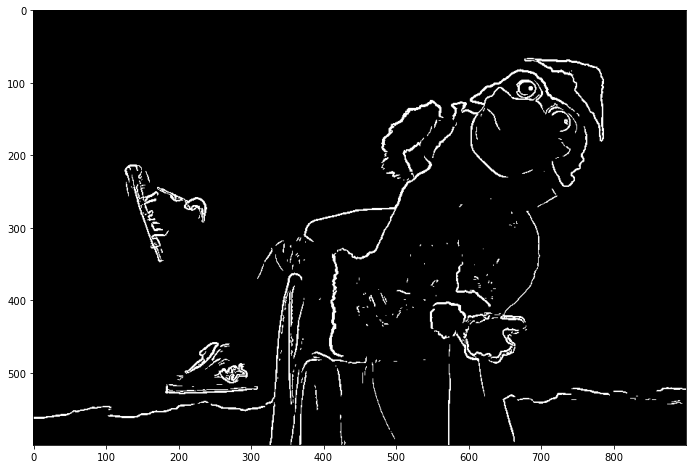

In [14]:
from skimage import filters
gradient_image = gradient_magnitude(original_image, 5)
hyst = filters.apply_hysteresis_threshold(gradient_image, 3300, 3600)
plt.figure(figsize=(12,8))
plt.imshow(hyst, cmap='gray')

###Edge Detection Kernels in 2D

**Recall earlier when we talked about how the Sobel operator has some smoothening inherently within it? Let's explore that briefly using the gradient_magnitude function that you wrote earlier. Display the results of running gradient_magnitude on original_image with a filter size of 1, and another using a filter size of 9.**

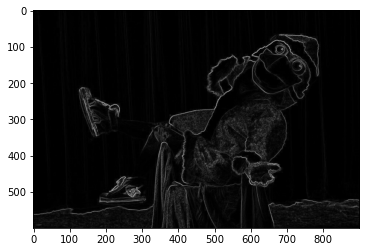

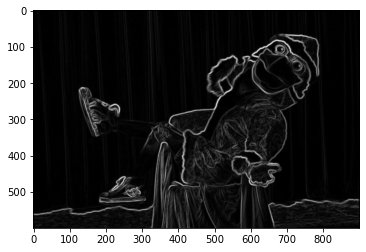

In [15]:
gradient_image = gradient_magnitude(original_image, 1)
plt.imshow(gradient_image , cmap = 'gray')
plt.show()
gradient_image = gradient_magnitude(original_image, 9)
plt.imshow(gradient_image , cmap = 'gray')
plt.show()

**What are the differences between these two?**

The picture generated with a greater filter size is more blurring

**We can also do this using the derivative of the gaussian filter directly, instead of using the sobel filter, using Scipy's implementation of gaussian filter. Use scipy's gaussian_filter to apply the derivative of the gaussian on our original image with a sigma=2 in the x direction, and then in the y direction separately.**

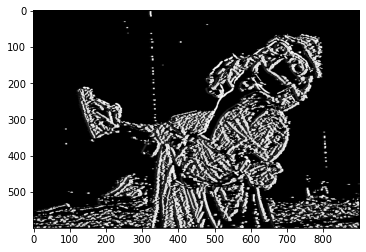

In [16]:
from scipy.ndimage import gaussian_filter

from scipy.ndimage import gaussian_filter1d
new_image = gaussian_filter1d(original_image, sigma=2 , axis = 0,order = 1)
new_image = gaussian_filter1d(new_image, sigma=2 , axis = 1, order = 1)

plt.imshow(new_image , cmap = 'gray')
plt.show()


**Repeat what you did above, this time applying the derivative of the gaussian in both directions simulataneously.**

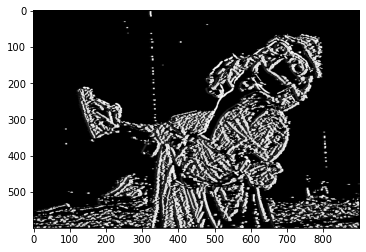

In [17]:
new_image2 = gaussian_filter(original_image, sigma=2 ,order=1)
plt.imshow(new_image2 , cmap = 'gray')
plt.show()

**Play around with the sigma parameter. What does increasing/decreasing sigma do to the resultant image?**

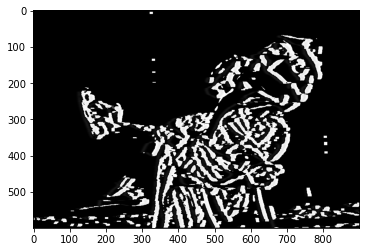

In [18]:
new_image2 = gaussian_filter(original_image, sigma=4 ,order=1)
plt.imshow(new_image2 , cmap = 'gray')
plt.show()

bigger sigma makes the picture more blurring

**Why do we need to apply smoothening before taking the derivative to find the edges?**

It can filter some noise(suppress the effect of noise) on the edges

**Recall that convolution operations are associative. Since both the gaussian smoothening and gradient operator are convolutions acting on the image, we see that we can convolve the gradient operator with the gaussian kernel, before convolving that resulting kernel with the image.**

**There's another edge detection kernel that we can use - the laplacian operator. This basically takes the second derivative, meaning that the edges would be the zero crossings after convolution. Give it a try using cv2.Laplacian on our original_image and display the results.**

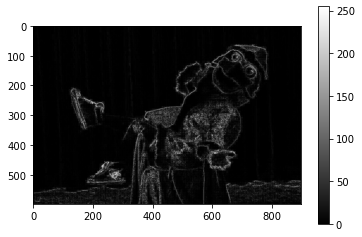

In [19]:
laplacian = cv2.Laplacian(original_image , cv2.CV_64F  )
laplacian = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian , cmap = 'gray')
plt.colorbar()

**If the image doesn't turn out very clear, make sure that the pixel value ranges are in a good range. If pixel values span from some negative number to some positive number, try to display the absolute value of the image instead.** 

**We see a lot of texture being picked up - let's smoothen the image first using scipy's gaussian filter with sigma=3, and then apply the same Laplacian filter again. Display the results**

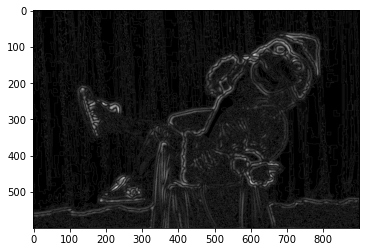

In [20]:
from scipy.ndimage import gaussian_filter
laplacian = cv2.Laplacian( gaussian_filter(original_image ,sigma =3) , cv2.CV_64F )
laplacian = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian , cmap = 'gray')


**It's easy to see that this works as an edge detector, and unlike the derivatives of gaussians filter, the edges are very thin and precise. However, it's very sensitive - almost too sensitive, as the amount of texture detected is very high, even after smoothening.**

**Good edge detection means good localization (laplacian) but robustness against noise (gaussian). Hence in order to combine the advantages, we can combine both. This is what the canny edge detector does.**

**In essence, the canny edge detector uses the sobel operator (derivative of gaussian approximation) to find the areas where an edge is. Because this uses the gaussian, it is more robust against noise, but is less accurate with regards to the exact position of the edge. Hence once the rough location of the edges are found, the laplacian of gaussians is run across the edge areas in order to better localize the edges. Since the laplacian is only run over areas identified by the Sobel operator as edges, it won't be detecting any noise as potential edges, which makes the Canny edge detector great at being robust against noise and great at localizing edges in the image.**

**Let's give it a try! Use OpenCV's canny edge detector implementation on our original_image. Notice that the second and third parameters are the hysteresis thresholds for when thresholding is used to find the edges. Use 250 and 400, respectively, but feel free to play around with the values. Display the image.**

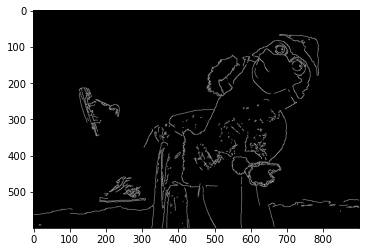

In [21]:
canny = cv2.Canny(original_image , 250 , 400 )
plt.imshow(canny , cmap = 'gray')

###**Hough Transform**

**The hough transform is a very nice and relatively simple method of object recognition. It works pretty well for simple shapes (e.g. circles, lines, etc) and is robust to both noise and disconnected edges. We'll walk through a simple implementation of a hough transform for lines in this notebook.**

**To start, load the 'cv_hough_transform.png' image and binarize it, shown below.**

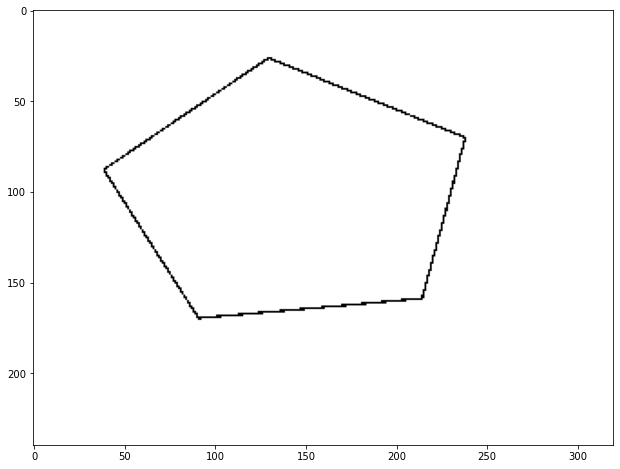

In [22]:
import cv2
hough_image = cv2.imread('cv_hough_transform.png', cv2.IMREAD_GRAYSCALE)
_, hough_image = cv2.threshold(hough_image, 30, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12,8))
plt.imshow(hough_image, cmap='gray')

**Now we want to define some of the boundaries for the hough transform parameters space. Based on slide 46, set appropriate the theta_min, theta_max, and rho_max.**

In [23]:
import math

x_max, y_max = hough_image.shape

theta_max = math.pi/2
theta_min = -math.pi/2
rho_max = 300.0
rho_min = -300.0

**We then create the hough space, where we have 200 values for rho, and 300 valules for theta.**

I changed a little about the range to have a more precise result.

In [24]:
rho_dim = 600 
theta_dim = 360
hough_space = np.zeros((rho_dim,theta_dim))

**We then loop through all of the edge pixels in the binarized edge image. For every theta from theta_min to theta_max, there is a rho that forms a line that goes through that pixel. Finish the expression for rho below by referencing slide 46. Then, compute the rho index to the hough space that we increment corresponding to that rho.**

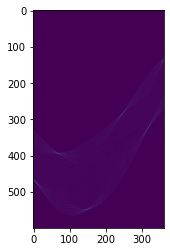

In [31]:
# Loop through every pixel
for x in range(x_max):
    for y in range(y_max):

        # If that pixel not an edge, we move on to the next
        if hough_image[x,y] == 255: continue

        # Loop through all theta from theta_min to theta_max in small increments
        for itheta in range(theta_dim):

            # Get the theta that this itheta corresponds to
            theta = theta_min + (1.0 * itheta * math.pi / theta_dim)

            # Compute the rho that together with theta draws a line through [x, y]
            rho = y * math.cos(theta) - x * math.sin(theta)

            # Scale the rho into somewhere between 0 to rho_max for indexing
            irho = rho - rho_min
            if(irho < 600 and irho >= 0) :
            # Increment that cell
                hough_space[int(irho),itheta] = hough_space[int(irho),itheta] + 1

plt.imshow(hough_space)

**We see above the hough space with sinosoidal lines draw - which is what we expected! Also notice the five distinct points of overlap within the hough space - that's what we expect as well given that there are five edges in the image. Now that we have the hough space, we are interested in the maximum. This is done via non-maximum suppression, and is already done for you.**

[[285 245]
 [324 316]
 [394  69]
 [476  10]
 [548 149]]


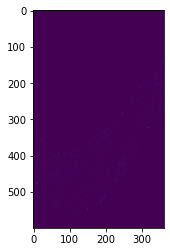

In [32]:
from scipy import ndimage
image = hough_space

image_max = ndimage.maximum_filter(hough_space, size=7, mode='constant')
mask = (image == image_max)
image *= mask

# Remove the image borders
image[:3] = 0
image[-3:] = 0
image[:, :3] = 0
image[:, -3:] = 0

# Find peaks above some threshold
image_t = (image > 60) * 1

# get coordinates of peaks
f = np.transpose(image_t.nonzero())

print(f)
plt.imshow(image)

**The hotspots have now been isolated (they're just points so they may be difficult to see). The coordinates of each of those points are [rho, theta] pairs that represent a line in the real image space. Note that the [rho, theta] in f here are just indices into the range of rho's and theta's that we used for our hough space - we need to first get the real rho and theta parameters in order to draw the lines. Using these points in the hough space, draw in the detected lines onto the hough_image using cv2.line.**

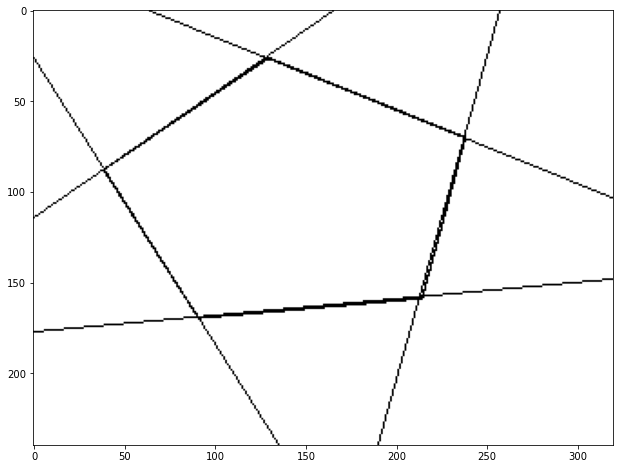

In [37]:
temp= hough_image.copy()
for parameters in f:
    [i, j] = parameters
  # Compute the real rho and theta parameters given the index in the hough space
    rho = i - 300.0
    theta = theta_min + (1.0 * j * math.pi / theta_dim)

  # Draw the lines here - you may need to compute x, y values for each line to be able to use cv2.line to draw them!
    y1 = 0
    y2 = 400
    x1 = int((rho+(y1*math.sin(theta)))/math.cos(theta))
    x2 = int((rho+(y2*math.sin(theta)))/math.cos(theta))
    image = cv2.line(temp, (x1,y1), (x2,y2), (0,0,0), 1)
plt.figure(figsize=(12,8))
plt.imshow(temp,cmap='gray')